In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from timeit import default_timer as timer

# Kernels
blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])
laplacian = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

In [2]:
originalImg = Image.open("data/comp.jpg").convert('L')
arrImage = np.asarray(originalImg)
originalImg.show()
originalImg.size

(1160, 660)

In [3]:
def conv(arrImg,kernel):
  start = timer() 
  A = arrImg
  C = np.zeros(A.shape)
  
  k=0
  kk=0
  # convolve
  for i in range(1, A.shape[0]-1):
    for j in range(1, A.shape[1]-1):
      block = A[k:3+k,kk:3+kk]
      C[i][j] =  np.dot(block.flatten(),kernel.flatten())
      kk+=1
    k+=1
    kk=0

  # Filling free space
  C[:, :1] = A[:, :1]
  C[:, C.shape[1]-1:C.shape[1]] = A[:, A.shape[1]-1:A.shape[1]]
  C[:1, :] = A[:1, :]
  C[C.shape[0]-1:C.shape[0], :] = A[A.shape[0]-1:A.shape[0], :]

  # Normalize 
  for i in range(1, A.shape[0]-1):
    for j in range(1, A.shape[1]-1):
      if(C[i][j] < 0):
        C[i][j] = 0
      if(C[i][j] >255):
        C[i][j] = 255

  end = timer()
  print(end - start)

  return C

1.3616838969992386


Text(0.5, 1.0, 'Blur')

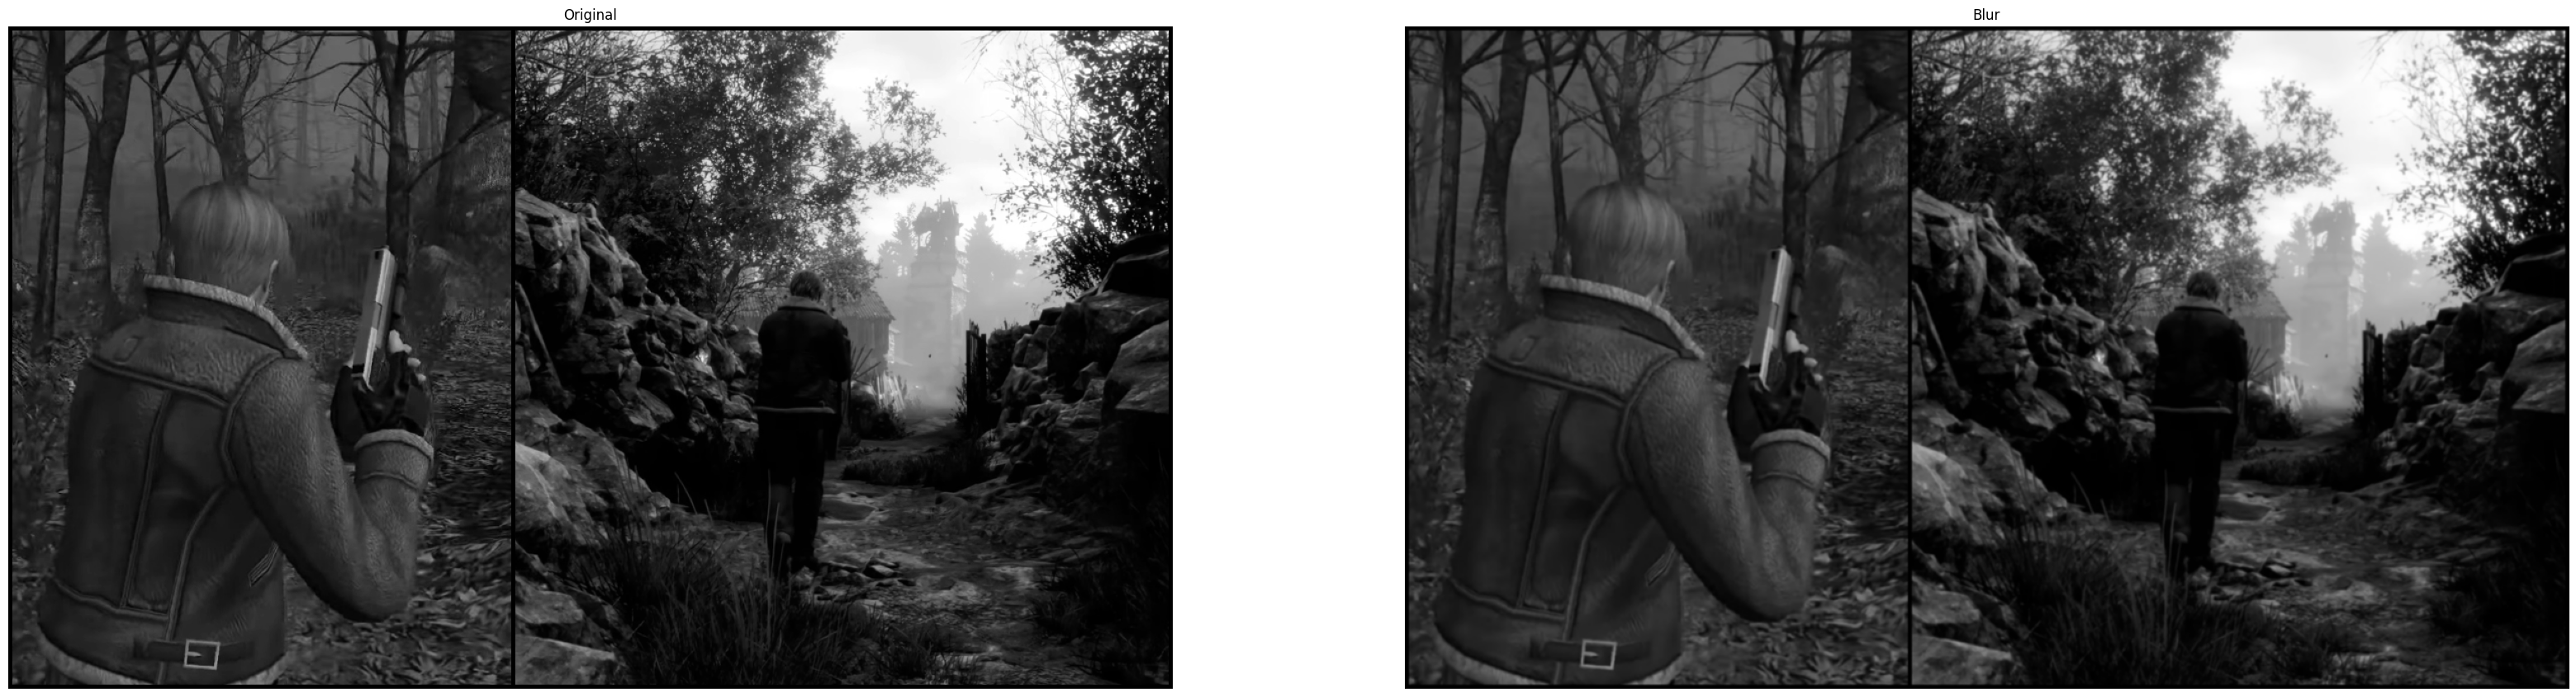

In [4]:
resultBlur = conv(arrImage, blur)
blurred = Image.fromarray(resultBlur)

fig = plt.figure(figsize=(40, 40))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(originalImg,cmap='gray')
plt.axis('off')
plt.title("Original")
  
fig.add_subplot(rows, columns, 2)
  
plt.imshow(blurred)
plt.axis('off')
plt.title("Blur")

1.5541225689994462


Text(0.5, 1.0, 'Sharpen')

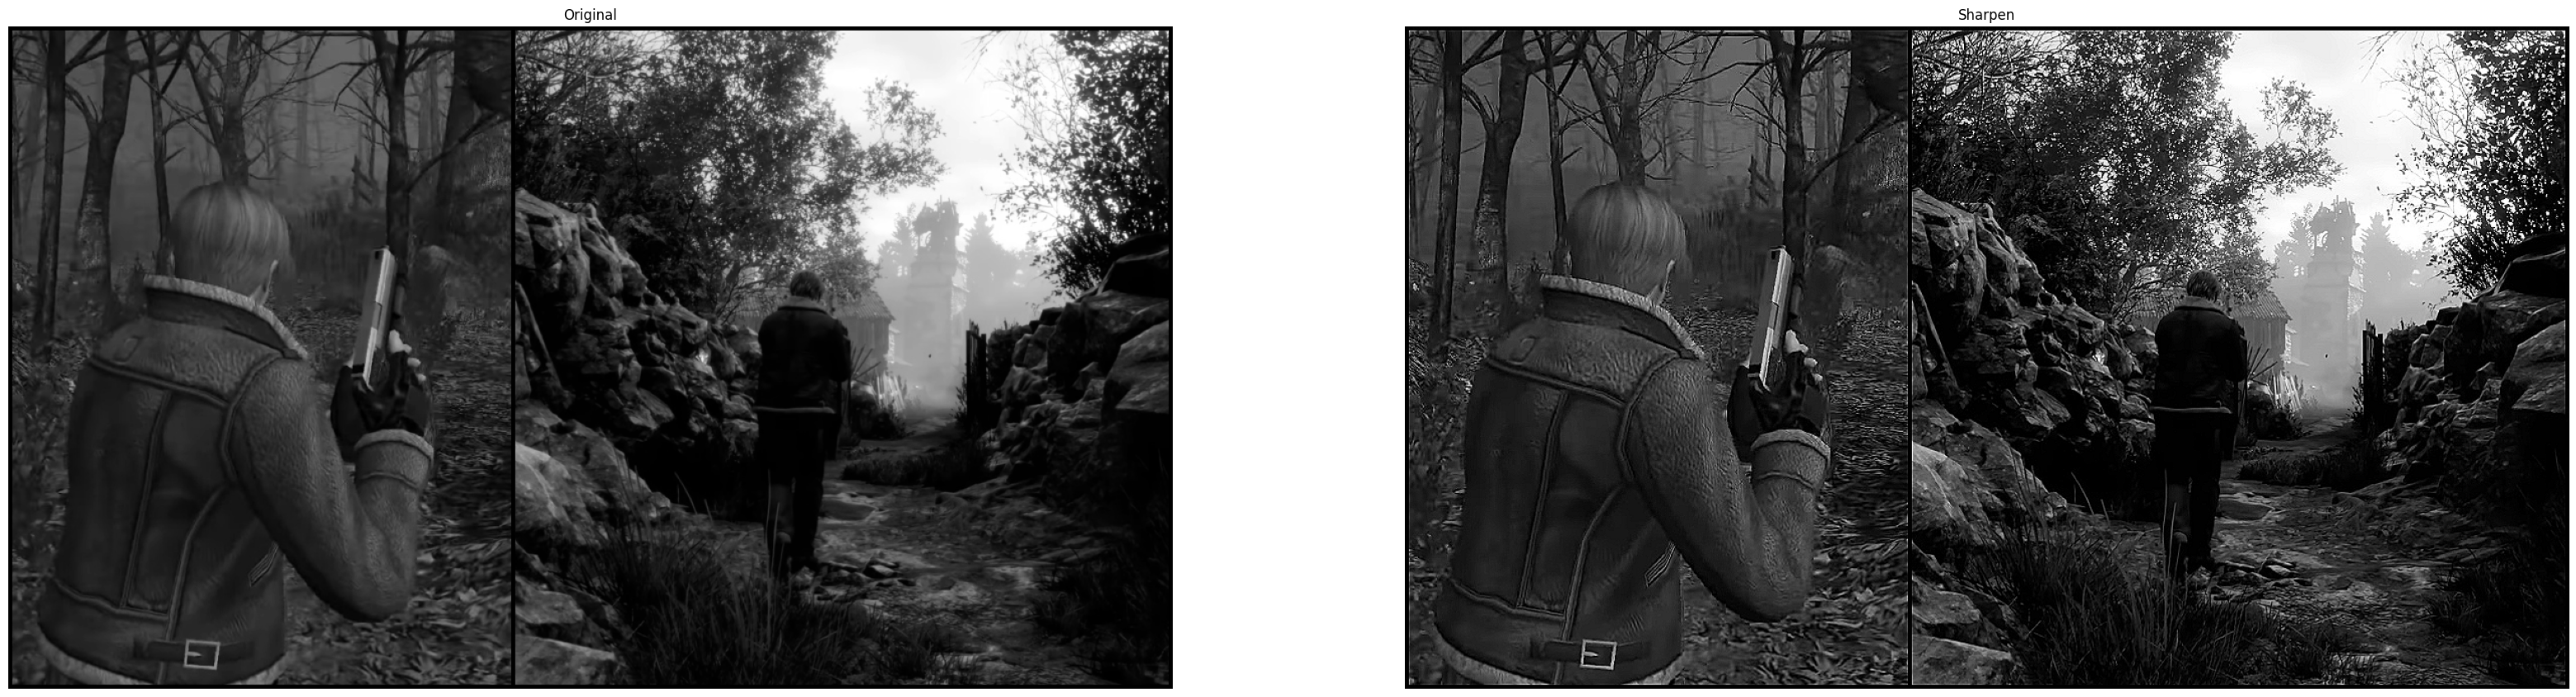

In [5]:
resultSharpen = conv(arrImage, sharpen)
sharp = Image.fromarray(resultSharpen)

fig = plt.figure(figsize=(40, 40))

fig.add_subplot(rows, columns, 1)
plt.imshow(originalImg,cmap='gray')
plt.axis('off')
plt.title("Original")
  
fig.add_subplot(rows, columns, 2)
plt.imshow(sharp)
plt.axis('off')
plt.title("Sharpen")


1.6174080000000686


Text(0.5, 1.0, 'Laplacian')

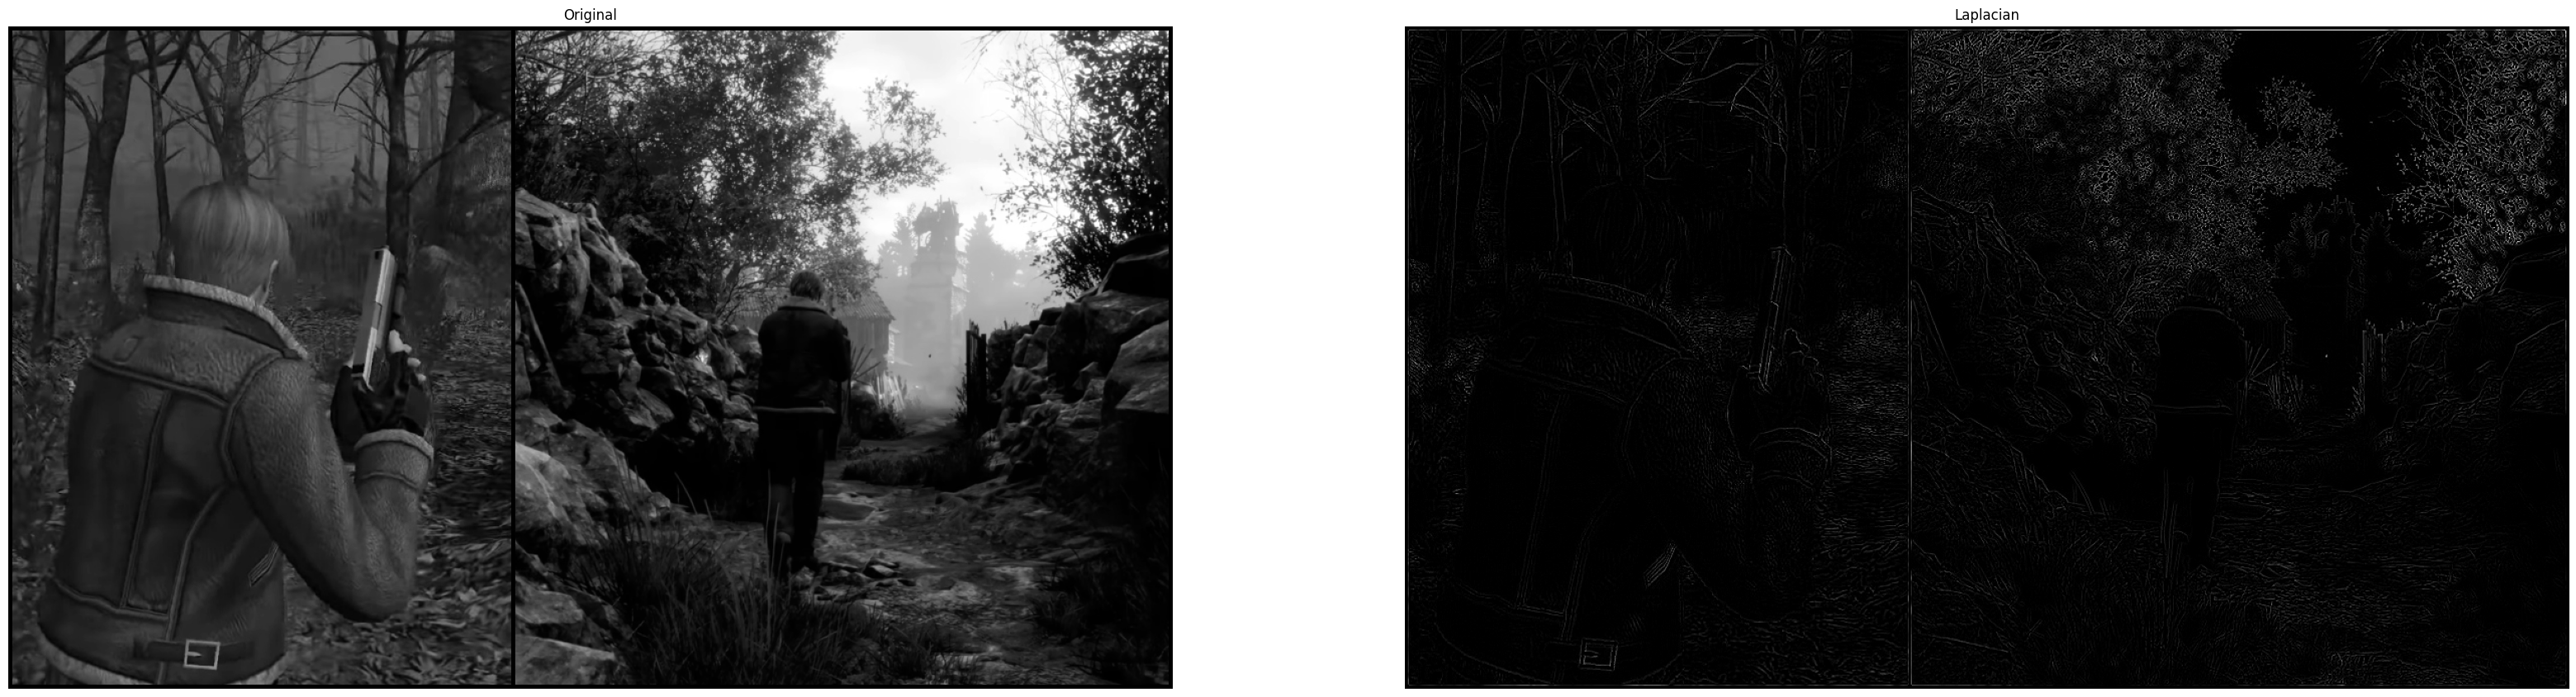

In [6]:
resultLaplacian = conv(arrImage, laplacian)
lap = Image.fromarray(resultLaplacian)

fig = plt.figure(figsize=(40, 40))

fig.add_subplot(rows, columns, 1)
plt.imshow(originalImg,cmap='gray')
plt.axis('off')
plt.title("Original")
  
fig.add_subplot(rows, columns, 2)
plt.imshow(lap)
plt.axis('off')
plt.title("Laplacian")

Text(0.5, 1.0, 'Laplacian')

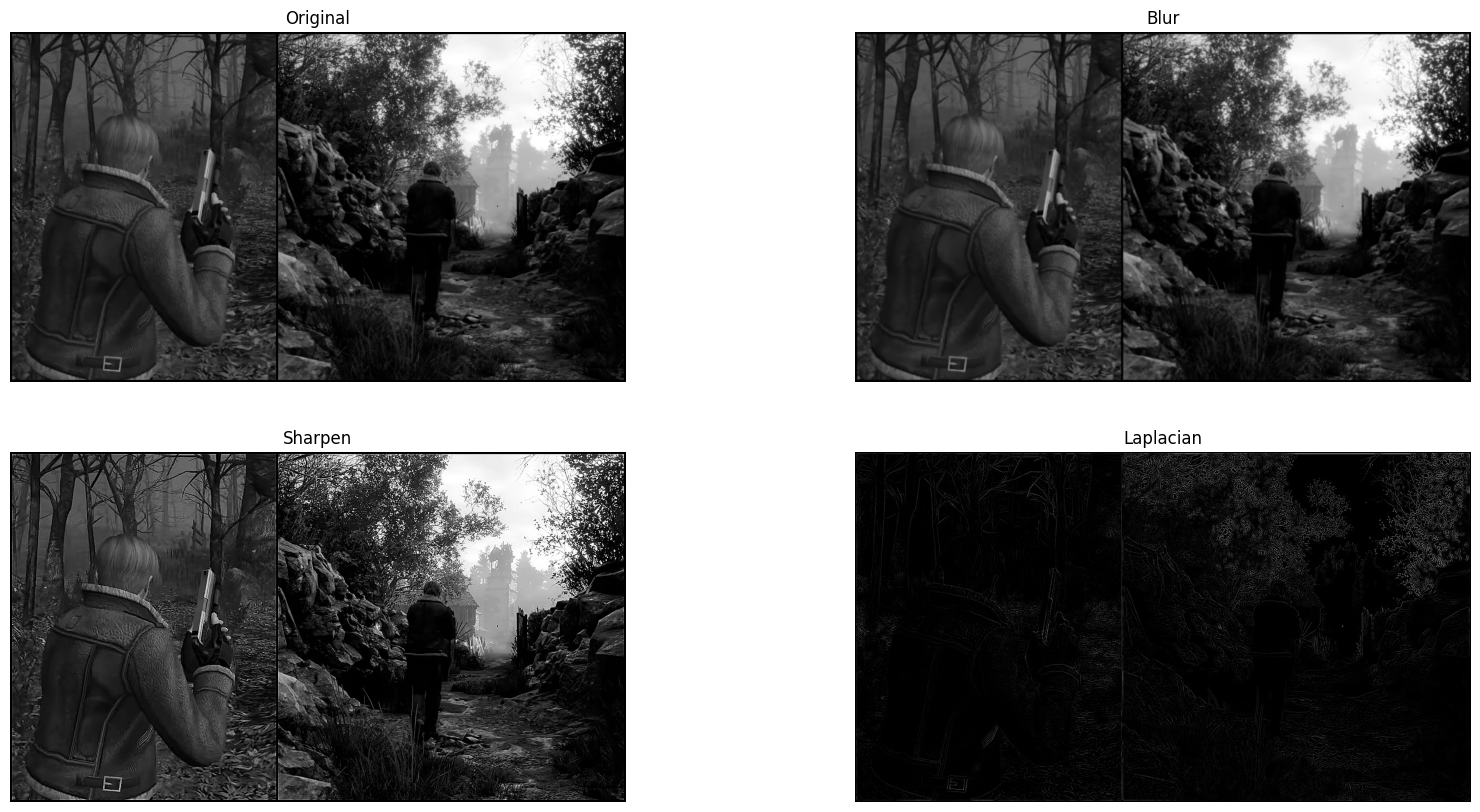

In [7]:
fig = plt.figure(figsize=(20, 10))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(originalImg,cmap='gray')
plt.axis('off')
plt.title("Original")
  
fig.add_subplot(rows, columns, 2)
  
plt.imshow(blurred)
plt.axis('off')
plt.title("Blur")
  
fig.add_subplot(rows, columns, 3)
  
plt.imshow(sharp)
plt.axis('off')
plt.title("Sharpen")
  
fig.add_subplot(rows, columns, 4)
  
plt.imshow(lap)
plt.axis('off')
plt.title("Laplacian")